In [1]:
!pip install missingno

### ЭТАПЫ ВЫПОЛНЕНИЯ РАБОТЫ
1. [Загрузка и предобработка данных](#start)
2. [Подготовка данных](#start_1)
3. [Обучение моделей](#start_2)
4. [Выводы](#start_3)

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from urllib.parse import urlencode 
from scipy import stats as st
import statistics as stat
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns
import math
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools
from sklearn.linear_model import LogisticRegression, Lasso, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import scipy.stats as st
from scipy.stats import spearmanr
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import precision_recall_curve
from sklearn.impute import SimpleImputer 
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import RandomizedSearchCV
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from numpy import median, mean
from sklearn.metrics import make_scorer
from sklearn.dummy import DummyRegressor, DummyClassifier
import statistics as stat
import phik
from phik import phik_matrix
from phik.report import plot_correlation_matrix
import lightgbm as lgb
import time
import missingno as msno
from scipy.optimize import curve_fit
import ast
import requests, json, io
from datetime import datetime, timedelta
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
import shap

## Загрузка и предобработка данных
   <a id="start"></a>

In [3]:
df_1 = pd.read_csv('C:\\Users\\79284\\Documents\\Мастер_2\\filtered_data\\apparel-purchases.csv', parse_dates=['date'])

In [4]:
df_1[:5]

,client_id,quantity,price,category_ids,date,message_id
0,1515915625468169594,1,1999.0,"['4', '28', '57', '431']",2022-05-16,1515915625468169594-4301-627b661e9736d
1,1515915625468169594,1,2499.0,"['4', '28', '57', '431']",2022-05-16,1515915625468169594-4301-627b661e9736d
2,1515915625471138230,1,6499.0,"['4', '28', '57', '431']",2022-05-16,1515915625471138230-4437-6282242f27843
3,1515915625471138230,1,4999.0,"['4', '28', '244', '432']",2022-05-16,1515915625471138230-4437-6282242f27843
4,1515915625471138230,1,4999.0,"['4', '28', '49', '413']",2022-05-16,1515915625471138230-4437-6282242f27843


In [5]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202208 entries, 0 to 202207
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   client_id     202208 non-null  int64         
 1   quantity      202208 non-null  int64         
 2   price         202208 non-null  float64       
 3   category_ids  202208 non-null  object        
 4   date          202208 non-null  datetime64[ns]
 5   message_id    202208 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 9.3+ MB


In [6]:
df_1.isna().sum()

client_id       0
quantity        0
price           0
category_ids    0
date            0
message_id      0
dtype: int64

In [7]:
df_2 = pd.read_csv('C:\\Users\\79284\\Documents\\Мастер_2\\filtered_data\\apparel-messages.csv', parse_dates=['date', 'created_at'])

In [8]:
df_2[:5]

,bulk_campaign_id,client_id,message_id,event,channel,date,created_at
0,4439,1515915625626736623,1515915625626736623-4439-6283415ac07ea,open,email,2022-05-19,2022-05-19 00:14:20
1,4439,1515915625490086521,1515915625490086521-4439-62834150016dd,open,email,2022-05-19,2022-05-19 00:39:34
2,4439,1515915625553578558,1515915625553578558-4439-6283415b36b4f,open,email,2022-05-19,2022-05-19 00:51:49
3,4439,1515915625553578558,1515915625553578558-4439-6283415b36b4f,click,email,2022-05-19,2022-05-19 00:52:20
4,4439,1515915625471518311,1515915625471518311-4439-628341570c133,open,email,2022-05-19,2022-05-19 00:56:52


In [9]:
df_2.isna().sum()

bulk_campaign_id    0
client_id           0
message_id          0
event               0
channel             0
date                0
created_at          0
dtype: int64

In [10]:
df_3 = pd.read_csv('C:\\Users\\79284\\Documents\\Мастер_2\\filtered_data\\apparel-target_binary.csv')

In [11]:
df_3[:5]

,client_id,target
0,1515915625468060902,0
1,1515915625468061003,1
2,1515915625468061099,0
3,1515915625468061100,0
4,1515915625468061170,0


In [12]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49849 entries, 0 to 49848
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   client_id  49849 non-null  int64
 1   target     49849 non-null  int64
dtypes: int64(2)
memory usage: 779.0 KB


In [13]:
df_3.isna().sum()

client_id    0
target       0
dtype: int64

In [14]:
df_4 = pd.read_csv('C:\\Users\\79284\\Documents\\Мастер_2\\filtered_data\\full_campaign_daily_event.csv', parse_dates=['date'])

In [15]:
df_4[:5]

,date,bulk_campaign_id,count_click,count_complain,count_hard_bounce,count_open,count_purchase,count_send,count_soft_bounce,count_subscribe,...,nunique_open,nunique_purchase,nunique_send,nunique_soft_bounce,nunique_subscribe,nunique_unsubscribe,count_hbq_spam,nunique_hbq_spam,count_close,nunique_close
0,2022-05-19,563,0,0,0,4,0,0,0,0,...,4,0,0,0,0,0,0,0,0,0
1,2022-05-19,577,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,2022-05-19,622,0,0,0,2,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0
3,2022-05-19,634,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,2022-05-19,676,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [16]:
df_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131072 entries, 0 to 131071
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   date                 131072 non-null  datetime64[ns]
 1   bulk_campaign_id     131072 non-null  int64         
 2   count_click          131072 non-null  int64         
 3   count_complain       131072 non-null  int64         
 4   count_hard_bounce    131072 non-null  int64         
 5   count_open           131072 non-null  int64         
 6   count_purchase       131072 non-null  int64         
 7   count_send           131072 non-null  int64         
 8   count_soft_bounce    131072 non-null  int64         
 9   count_subscribe      131072 non-null  int64         
 10  count_unsubscribe    131072 non-null  int64         
 11  nunique_click        131072 non-null  int64         
 12  nunique_complain     131072 non-null  int64         
 13  nunique_hard_b

In [17]:
df_5 = pd.read_csv('C:\\Users\\79284\\Documents\\Мастер_2\\filtered_data\\full_campaign_daily_event_channel.csv',  parse_dates=['date'])

In [18]:
df_5[:5]

,date,bulk_campaign_id,count_click_email,count_click_mobile_push,count_open_email,count_open_mobile_push,count_purchase_email,count_purchase_mobile_push,count_soft_bounce_email,count_subscribe_email,...,count_send_email,nunique_hard_bounce_email,nunique_hbq_spam_email,nunique_send_email,count_soft_bounce_mobile_push,nunique_soft_bounce_mobile_push,count_complain_email,nunique_complain_email,count_close_mobile_push,nunique_close_mobile_push
0,2022-05-19,563,0,0,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2022-05-19,577,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2022-05-19,622,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2022-05-19,634,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2022-05-19,676,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
df_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131072 entries, 0 to 131071
Data columns (total 36 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   date                             131072 non-null  datetime64[ns]
 1   bulk_campaign_id                 131072 non-null  int64         
 2   count_click_email                131072 non-null  int64         
 3   count_click_mobile_push          131072 non-null  int64         
 4   count_open_email                 131072 non-null  int64         
 5   count_open_mobile_push           131072 non-null  int64         
 6   count_purchase_email             131072 non-null  int64         
 7   count_purchase_mobile_push       131072 non-null  int64         
 8   count_soft_bounce_email          131072 non-null  int64         
 9   count_subscribe_email            131072 non-null  int64         
 10  count_unsubscribe_email          131072 non-

In [20]:
df_1.duplicated().sum()

73020

In [21]:
df_2.duplicated().sum()

48610

In [22]:
df_2.duplicated().sum()

48610

In [23]:
df_3.duplicated().sum()

0

In [24]:
df_4.duplicated().sum()

0

In [25]:
df_5.duplicated().sum()

0

<div class="alert alert-info">
   Все загруженные таблицы отображают верный тип данных и не содержат пропусков. В исходных данных 1, 2 и 3 таблиц было обнаружено и удалено 48610
дубликатов.
</div>

## Подготовка данных
   <a id="start_1"></a>

In [26]:
len(df_1['client_id'].unique())

49849

In [27]:
df_1_1 = df_1.groupby('client_id', as_index = False).agg({'date':'nunique'}).sort_values(by = 'date', ascending = False)

In [28]:
df_1_1[:15]

,client_id,date
44817,1515915625853312319,41
13493,1515915625490334876,23
45067,1515915625860624470,17
24648,1515915625554355124,16
31601,1515915625579040539,15
532,1515915625468102493,15
18479,1515915625500232103,15
24162,1515915625551743388,12
1220,1515915625468158647,12
2879,1515915625470860261,11


In [29]:
df_1['client_id'].nunique()

49849

In [30]:
df_1['date'].max() - df_1['date'].min()

Timedelta('641 days 00:00:00')

In [31]:
len(df_1_1.loc[df_1_1['date'] == 1])

42706

In [32]:
len(df_1_1.loc[df_1_1['date'] == 2])

5285

In [33]:
df_1_1 = df_1_1.rename(columns = {'date':'active_days'})

<div class="alert alert-info">
   Из 49849 уникальных клиентов только 13 совершали покупки более 10 дней за весь срок наблюдений (641 день). Абсолютное большинство клиентов (42796)
пользовались услугами только 1 день (разовые покупки), а также не 2 раз (5285 клиентов). Соответственно, цель должна быть пропорциональна количеству
дней, в течение которых клиент делал покупки. Однако, из-за большого количества одинаковых значений, данный признак ('active_days') малоинформативен и 
нуждается в уточнении.
</div>

In [34]:
def d(x):
    x = x[1:]
    x = x[:-1]
    x = x.split(',')
    return x[0]
df_1['cat_1'] = df_1['category_ids'].apply(d)

In [35]:
def d(x):
    x = x[1:]
    x = x[:-1]
    x = x.split(',')
    return str(x[0]) + str(x[-1])
df_1['cat_2'] = df_1['category_ids'].apply(d)

In [36]:
df_1['cost'] = df_1['price']*df_1['quantity']

In [37]:
df_1_2 = df_1.groupby('client_id', as_index = False).agg({'cost':'sum'}).sort_values(by = 'cost', ascending = False)

In [38]:
df_1_2['cost'].max()

540408.0

In [39]:
len(df_1_2.query('cost < 100000'))

49828

<div class="alert alert-info">
   Абсолютное большинство клиентов (49828) в период наблюдений совершили покупки на сумму не более 100000, а максимальная сумма покупок клиента - 540408.
Обшая сумма покупок уникального клиента, по-видимому, пропорциональна цели, поэтому этот признак следует включить в итоговый датафрейм.
</div>

In [40]:
df_1_3= df_1.groupby('client_id', as_index = False).agg({'price':'count'}).sort_values(by = 'price', ascending = False)

In [41]:
df_1_3 = df_1_3.rename(columns = {'price':'num_cost'})

In [42]:
df_1_3[:10]

,client_id,num_cost
44817,1515915625853312319,346
36600,1515915625624308268,218
35816,1515915625607113301,210
2879,1515915625470860261,131
18479,1515915625500232103,131
17169,1515915625491750681,121
13552,1515915625490352441,111
33360,1515915625586493853,107
28053,1515915625559931867,103
5782,1515915625487144079,98


<div class="alert alert-info">
    Только 9 клиентов в период наблюдений имели более 100 купленных позиций (максимальное число позиций на клиента 346). Количеств приобретенных позиций
'num_cost' является признаком активности клиента и, вероятно, пропорционально цели. 
</div>

In [43]:
df_1_4 = df_1.groupby('client_id', as_index = False).agg({'cost':'mean'}).sort_values(by = 'cost', ascending = False)

In [44]:
df_1_4 = df_1_4.rename(columns = {'cost':'avg_cost'})

In [45]:
df_1_4[:5]

,client_id,avg_cost
47733,1515915625971673322,53499.0
39483,1515915625692218402,48499.0
47310,1515915625959777467,48499.0
49142,1515915625995288129,48299.0
42132,1515915625781028303,37240.0


In [46]:
len(df_1_4.loc[df_1_4['avg_cost'] < 10000])

49734

<div class="alert alert-info">
    Средняя стоимость всех позиций большинства клиентов (49734) менее 10000 (максималоьная стредняя стоимость позиций клиента 53499). Вероятность цели
должна увеличиваться с ростом средней стоимости ползиции.
</div>

In [47]:
df_1_5 = df_1.groupby('client_id', as_index = False).agg({'quantity':'count'}).sort_values(by = 'quantity', ascending = False)

In [48]:
df_1_5[:10]

,client_id,quantity
44817,1515915625853312319,346
36600,1515915625624308268,218
35816,1515915625607113301,210
2879,1515915625470860261,131
18479,1515915625500232103,131
17169,1515915625491750681,121
13552,1515915625490352441,111
33360,1515915625586493853,107
28053,1515915625559931867,103
5782,1515915625487144079,98


<div class="alert alert-info">
    Общее количество единиц товара на одного клиента также может свидетельствовать об его активности и являться признаком, влияющим на цель.
</div>

In [49]:
df_1_6 = df_1.groupby('client_id', as_index = False).agg({'quantity':'mean'}).sort_values(by = 'quantity', ascending = False)

In [50]:
df_1_6 = df_1_6.rename(columns = {'quantity':'quantity_mean'})

<div class="alert alert-info">
    Среднее количество единиц в каждой приобретенной позиции также может являться признаком активности клиента, влияющим на цель. 
</div>

In [51]:
df_1_cat = df_1.groupby('cat_1', as_index = False).agg({'price':'count'}).sort_values(by = 'price', ascending = False)

In [52]:
df_1_cat[:1]['price'].sum()/df_1_cat['price'].sum()

0.5567435511948093

In [53]:
cat_1 = list(df_1_cat[:2]['cat_1'])

<div class="alert alert-info">
    Более 50 % заказов составляют товары только 2 'любимых' крупных категорий. Можно предположить, что постоянные клиенты покупают товары именно этих 2
крупных категорий.
</div>

In [54]:
df_1_cat_1 = df_1.loc[df_1['cat_1'].isin(cat_1)]

In [55]:
df_1_cat_1_v = df_1_cat_1.groupby('client_id', as_index = False).agg({'cost':'sum'}).sort_values(by = 'cost', ascending = False)

In [56]:
df_1_cat_1_v = df_1_cat_1_v.rename(columns = {'cost':'cost_cat_1'})

<div class="alert alert-info">
    Общие расходы клиента на покупку товаров 'любимых' макрокатегорий является признаком, влияющим на цель. 
</div>

In [57]:
df_1_cat_2 = df_1.groupby('cat_2', as_index = False).agg({'price':'count'}).sort_values(by = 'price', ascending = False)

In [58]:
df_1_cat_2[:50]['price'].sum()/df_1_cat_2['price'].sum()

0.5884238012343725

In [59]:
len(df_1_cat_2)

893

In [60]:
cat_2 = list(df_1_cat_2[:100]['cat_2'])

<div class="alert alert-info">
    Также выявлено 100 'любимых' сочетаний макро- и микрокатегорий (около 50 % всех заказов), доля которых в покупках клиентов выявляет склонность 
клиента к постоянству.
</div>

In [61]:
df_1_cat_2_ = df_1.loc[df_1['cat_2'].isin(cat_2)]

In [62]:
df_1_cat_2_v = df_1_cat_2_.groupby('client_id', as_index = False).agg({'cost':'sum'}).sort_values(by = 'cost', ascending = False)

In [63]:
df_1_cat_2_v = df_1_cat_2_v.rename(columns = {'cost':'cost_cat_2'})

<div class="alert alert-info">
    Общие расходы клиента на покупку товаров 100 'любимых' сочетаний макро- и микрокатегорий является признаком, влияющим на цель. 
</div>

In [64]:
date_v = df_1['date'].max() - timedelta(days=100)

In [65]:
df_1_v = df_1.loc[df_1['date'] > date_v]

In [66]:
df_1_2_v = df_1_v.groupby('client_id', as_index = False).agg({'cost':'sum'}).sort_values(by = 'cost', ascending = False)

In [67]:
df_1_2_v = df_1_2_v.rename(columns = {'cost':'cost_v'})

<div class="alert alert-info">
    Активность клиента в последние 100 дней наблюдаемого периода связана с целью и может свидетельствовать о снижении вероятности цели 
(клиент в последний период много покупал, и надобность в покупаках могла не успеть сформироваться в валидационный период). Соответственно, общая сумма
покупок клиента в последние 100 дней является признаком, влияющим на цель.
</div>

In [68]:
df_1_3_v = df_1_v.groupby('client_id', as_index = False).agg({'price':'count'}).sort_values(by = 'price', ascending = False)

In [69]:
df_1_3_v = df_1_3_v.rename(columns = {'price':'num_cost_v'})

<div class="alert alert-info">
    Количество купленных заказов (позиций) клиента в последние 100 дней характеризует его активность перед валидационным периодом, и, соответственно,
влияет на цель.
</div>

In [70]:
df_1_1 = df_1_1.reset_index(drop=True)
df_1_2 = df_1_2.reset_index(drop=True)

In [71]:
df_1_f = df_1_1.merge(df_1_2, how = 'left', on = 'client_id')

In [72]:
df_1_f = df_1_f.merge(df_1_3, how = 'left', on = 'client_id')

In [73]:
df_1_f = df_1_f.merge(df_1_4, how = 'left', on = 'client_id')

In [74]:
df_1_f = df_1_f.merge(df_1_5, how = 'left', on = 'client_id')

In [75]:
df_1_f = df_1_f.merge(df_1_6, how = 'left', on = 'client_id')

In [76]:
df_1_f = df_1_f.merge(df_1_2_v, how = 'left', on = 'client_id')

In [77]:
df_1_f = df_1_f.merge(df_1_3_v, how = 'left', on = 'client_id')

In [78]:
df_1_f = df_1_f.merge(df_1_cat_1_v, how = 'left', on = 'client_id')

In [79]:
df_1_f = df_1_f.merge(df_1_cat_2_v, how = 'left', on = 'client_id')

In [80]:
df_1_f['cost_v'] = df_1_f['cost_v'].fillna(0)

In [81]:
df_1_f['num_cost_v'] = df_1_f['num_cost_v'].fillna(0)

In [82]:
df_1_f['cost_cat_1'] = df_1_f['cost_cat_1'].fillna(0)

In [83]:
df_1_f['cost_cat_2'] = df_1_f['cost_cat_2'].fillna(0)

In [84]:
df_1_f['ratio_cat_1'] = df_1_f['cost_cat_1']/df_1_f['cost']

In [85]:
df_1_f['ratio_cat_2'] = df_1_f['cost_cat_2']/df_1_f['cost']

In [86]:
df_1_f['ratio_cost'] = df_1_f['cost_v']/df_1_f['cost']

In [87]:
df_1_f['ratio_num'] = df_1_f['num_cost_v']/df_1_f['num_cost']

<div class="alert alert-info">
    Новые признаки были объеденены в единый датафрейм df_1_f. В качестве признаков были введены также новые поля, характеризующие долю суммы покупок 
клиентов в последние 100 дней ('ratio_cost'), долю количества позиций, приобретенных клиентом в последние 100 дней ('ratio_num'), долю затрат клиента 
на 'любимую' макрокатегорию ('ratio_cat_1'), доля трат клиента на 'любимое' сочетание макро- и микрокатегорий ('ratio_cat_2') и доля отправленных
сообщений, которая приходится на 1 позицию заказаь клиента. 
</div>

In [88]:
df_2['event'].unique()

array(['open', 'click', 'purchase', 'send', 'unsubscribe', 'hbq_spam',
       'hard_bounce', 'subscribe', 'soft_bounce', 'complain', 'close'],
      dtype=object)

In [89]:
len(df_2['client_id'].unique())

53329

In [90]:
positive = ['purchase', 'subscribe']

In [91]:
neutral = ['open', 'click', 'close']

In [92]:
negative = ['unsubscribe', 'hard_bounce', 'complain', 'soft_bounce', 'hbq_spam']

In [93]:
df_2_o = df_2.groupby(['client_id', 'event'], as_index = False).agg({'message_id':'count'})

In [94]:
len(df_2_o)

206134

In [95]:
df_2_sum = df_2_o.groupby('client_id', as_index = False).agg({'message_id':'sum'})

In [96]:
df_2_sum = df_2_sum.rename(columns = {'message_id':'event_sum'})

In [97]:
df_2_pos = df_2_o.loc[df_2_o['event'].isin(positive)]

In [98]:
df_2_pos = df_2_pos.groupby('client_id', as_index = False).agg({'message_id':'sum'})

In [99]:
df_2_pos = df_2_pos.rename(columns = {'message_id':'event_pos'})

In [100]:
df_2_neu = df_2_o.loc[df_2_o['event'].isin(neutral)]

In [101]:
df_2_neu = df_2_neu.groupby('client_id', as_index = False).agg({'message_id':'sum'})

In [102]:
df_2_neu = df_2_neu.rename(columns = {'message_id':'event_neu'})

In [103]:
df_2_neg = df_2_o.loc[df_2_o['event'].isin(negative)]

In [104]:
df_2_neg = df_2_neg.groupby('client_id', as_index = False).agg({'message_id':'sum'})

In [105]:
df_2_neg = df_2_neg.rename(columns = {'message_id':'event_neg'})

In [106]:
df_2_t = df_2_sum.merge(df_2_pos, on = 'client_id', how = 'outer')

In [107]:
df_2_t = df_2_t.merge(df_2_neu, on = 'client_id', how = 'outer')

In [108]:
df_2_t = df_2_t.merge(df_2_neg, on = 'client_id', how = 'outer')

In [109]:
df_2_t['event_neu'] = df_2_t['event_neu'].fillna(0)

In [110]:
df_2_t['event_neg'] = df_2_t['event_neg'].fillna(0)

In [111]:
df_2_t['event_pos'] = df_2_t['event_pos'].fillna(0)

In [112]:
df_2_t['event_sum'] = df_2_t['event_sum'].fillna(0)

In [113]:
df_2_t['rat_ev_pos'] = df_2_t['event_pos']/df_2_t['event_sum']

In [114]:
df_2_t['rat_ev_neu'] = df_2_t['event_neu']/df_2_t['event_sum']

In [115]:
df_2_t['rat_ev_neg'] = df_2_t['event_neg']/df_2_t['event_sum']

In [116]:
df_2_t = df_2_t.drop(['event_neu', 'event_neg', 'event_pos', 'event_sum'], axis = 1)

<div class="alert alert-info">
   События в поле 'event' были выделены в 3 группы: позитивные, нейтральные и негативные. Для каждого клиента были найдены доли позитивных, нейтральных 
и негативных реакций на сообщения, которые являются признаками, влияющими на цель.
</div>

In [117]:
df_f = df_1_f.merge(df_2_t, how = 'left', on = 'client_id')

In [118]:
df_f.loc[df_f['rat_ev_pos'].isna(), 'rat_ev_pos'] = df_f['rat_ev_pos'].median()

In [119]:
df_f.loc[df_f['rat_ev_neu'].isna(), 'rat_ev_neu'] = df_f['rat_ev_neu'].median()

In [120]:
df_f.loc[df_f['rat_ev_neg'].isna(), 'rat_ev_neg'] = df_f['rat_ev_neg'].median()

<div class="alert alert-info">
   Новые признаки добавлены в финальную таблицу df_f. Пропуски в столбцах заменены медианными значениями.
</div>

In [121]:
positive_n = ['nunique_purchase', 'nunique_subscribe']

In [122]:
negative_n = ['nunique_unsubscribe', 'nunique_hard_bounce', 'nunique_complain', 'nunique_soft_bounce', 'nunique_hbq_spam']

In [123]:
df_4['nunique_pos'] = df_4['nunique_purchase'] + df_4['nunique_subscribe']

In [124]:
df_4['nunique_neg'] = df_4['nunique_unsubscribe'] + df_4['nunique_hard_bounce'] + df_4['nunique_complain'] + df_4['nunique_soft_bounce'] + df_4['nunique_hbq_spam']

In [125]:
df_4_v = df_4.loc[df_4['date'] > date_v]

In [126]:
df_4_v_pos = df_4_v.groupby('bulk_campaign_id', as_index = False).agg({'nunique_pos':'mean'}).sort_values(by = 'nunique_pos', ascending = False)[:100]

In [127]:
df_4_v_neg = df_4_v.groupby('bulk_campaign_id', as_index = False).agg({'nunique_neg':'mean'}).sort_values(by = 'nunique_neg', ascending = False)[:100]

In [128]:
active_pos = list(df_4_v_pos['bulk_campaign_id'])

In [129]:
active_neg = list(df_4_v_neg['bulk_campaign_id'])

In [130]:
df_2_act_pos = df_2.loc[df_2['bulk_campaign_id'].isin(active_pos)].groupby('client_id', as_index = False).agg({'bulk_campaign_id':'count'})

In [131]:
df_2_act_pos = df_2_act_pos.rename(columns = {'bulk_campaign_id':'comp_pos'})

In [132]:
len(df_2_act_pos)

31525

In [133]:
df_2_pos_ = df_2.groupby('client_id', as_index = False).agg({'bulk_campaign_id':'count'})

In [134]:
df_2_pos_ = df_2_pos_.rename(columns = {'bulk_campaign_id':'comp'})

In [135]:
len(df_2_pos_)

53329

In [136]:
df_4_pos = df_2_pos_.merge(df_2_act_pos, on = 'client_id', how = 'left')

In [137]:
df_4_pos['rat_comp_pos'] = df_4_pos['comp_pos']/df_4_pos['comp']

In [138]:
df_4_pos['rat_comp_pos'] = df_4_pos['rat_comp_pos'].fillna(0)

In [139]:
df_4_pos = df_4_pos.drop(['comp', 'comp_pos'], axis = 1)

<div class="alert alert-info">
   Был получен список из 100 рекламных компаний, которые давали в сумме наиболее успешный результат в последние 100 дней наблюдаемого периода. Для
каждого клиента была найдена доля наиболее успешных (в последние 100 дней) рекламных компаний ('rat_comp_pos'), которая, вероятно, будет пропорциональна
цели.
</div>

In [140]:
df_2_act_neg = df_2.loc[df_2['bulk_campaign_id'].isin(active_neg)].groupby('client_id', as_index = False).agg({'bulk_campaign_id':'count'})

In [141]:
df_2_act_neg = df_2_act_neg.rename(columns = {'bulk_campaign_id':'comp_neg'})

In [142]:
len(df_2_act_neg)

43783

In [143]:
df_4_neg = df_2_pos_.merge(df_2_act_neg, on = 'client_id', how = 'left')

In [144]:
df_4_neg['rat_comp_neg'] = df_4_neg['comp_neg']/df_4_neg['comp']

In [145]:
df_4_neg['rat_comp_neg'] = df_4_neg['rat_comp_neg'].fillna(0)

In [146]:
df_4_neg = df_4_neg.drop(['comp', 'comp_neg'], axis = 1)

<div class="alert alert-info">
   Был получен список из 100 рекламных компаний, которые давали в сумме негативный результат в последние 100 дней наблюдаемого периода. Для
каждого клиента была найдена доля наиболее провальных (в последние 100 дней) рекламных компаний ('rat_comp_neg'), которая должна обратнопропорционально
влиять на цель.
</div>

In [147]:
df_f = df_f.merge(df_4_pos, on = 'client_id', how = 'left')

In [148]:
df_f = df_f.merge(df_4_neg, on = 'client_id', how = 'left')

In [149]:
df_f.loc[df_f['rat_comp_pos'].isna(), 'rat_comp_pos'] = df_f['rat_comp_pos'].median() 

In [150]:
df_f.loc[df_f['rat_comp_neg'].isna(), 'rat_comp_neg'] = df_f['rat_comp_neg'].median() 

<div class="alert alert-info">
   Новые признаки (доли позитивных и негативных рекламных компаний) были добавлены в итоговый датафрейм, а пропуски заменены медианными значениями 
данных признаков.
</div>

In [151]:
df_5_v = df_5.loc[df_5['date'] > date_v]

In [152]:
push_pos = df_5_v['nunique_purchase_mobile_push'].sum() + df_5_v['nunique_open_mobile_push'].sum() 

In [153]:
push_neg = df_5_v['nunique_soft_bounce_mobile_push'].sum() + df_5_v['nunique_hard_bounce_mobile_push'].sum()  

In [154]:
mail_pos = df_5_v['nunique_purchase_email'].sum() + df_5_v['nunique_open_email'].sum() 

In [155]:
mail_neg = df_5_v['nunique_soft_bounce_email'].sum() + df_5_v['nunique_hard_bounce_email'].sum()  

In [156]:
mail_pos/push_pos

0.04980517750035696

In [157]:
mail_neg/push_neg

0.39715248410616005

<div class="alert alert-info">
   При анализе каналов, которые использовались в последние 100 дней наблюдаемого периода, выяснилось, что по совокупности ежедневных уникальных 
позитивных действий, канал mobile_push на 95 % более эффективен, чем email. Сравнение суммы уникальных негативных действий показывает также, что 
канал mobile_push имеет на 20 % меньше негативных действий, чем email. 
</div>

In [158]:
df_2_chan = df_2.groupby(['client_id', 'channel'], as_index = False).agg({'message_id':'count'})

In [159]:
df_2_push = df_2_chan.query('channel == "mobile_push"')

In [160]:
df_2_push = df_2_push.rename(columns = {'message_id':'push'}).drop('channel', axis = 1)

In [161]:
df_2_mail = df_2_chan.query('channel == "email"')

In [162]:
df_2_mail = df_2_mail.rename(columns = {'message_id':'email'}).drop('channel', axis = 1)

In [163]:
df_2_channel = df_2_push.merge(df_2_mail, on = 'client_id', how = 'outer').fillna(0)

In [164]:
df_2_channel['rat_chan'] = df_2_channel['push']/(df_2_channel['push']+df_2_channel['email'])

In [165]:
df_2_channel = df_2_channel.drop(['push', 'email'], axis = 1)

In [166]:
df_f = df_f.merge(df_2_channel, on = 'client_id', how = 'left')

In [167]:
df_f.loc[df_f['rat_chan'].isna(), 'rat_chan'] = df_f['rat_chan'].median()

<div class="alert alert-info">
   Для каждого клиента была найдена доля сообщений, отправленных через канал push_mobile ('rat_chan'), которая добавлена в финальный датафрейм в 
в качестве признака, влияющего на цель.
</div>

In [168]:
df_f[:2]

,client_id,active_days,cost,num_cost,avg_cost,quantity,quantity_mean,cost_v,num_cost_v,cost_cat_1,...,ratio_cat_1,ratio_cat_2,ratio_cost,ratio_num,rat_ev_pos,rat_ev_neu,rat_ev_neg,rat_comp_pos,rat_comp_neg,rat_chan
0,1515915625853312319,41,270987.0,346,783.199422,346,1.026012,18075.0,50.0,108541.0,...,0.400540,0.911785,0.066701,0.144509,0.004785,0.217391,0.0,0.049363,0.073913,0.551763
1,1515915625490334876,23,19194.0,50,383.880000,50,1.000000,138.0,2.0,14600.0,...,0.760654,0.890278,0.007190,0.040000,0.061224,0.736395,0.0,0.000000,0.008503,0.000000


In [169]:
colm = list(df_f.columns)

In [170]:
colm.pop(0)

'client_id'

In [171]:
phik_overview = df_f.drop('client_id', axis = 1).phik_matrix(interval_cols=colm)
phik_overview.shape

(20, 20)

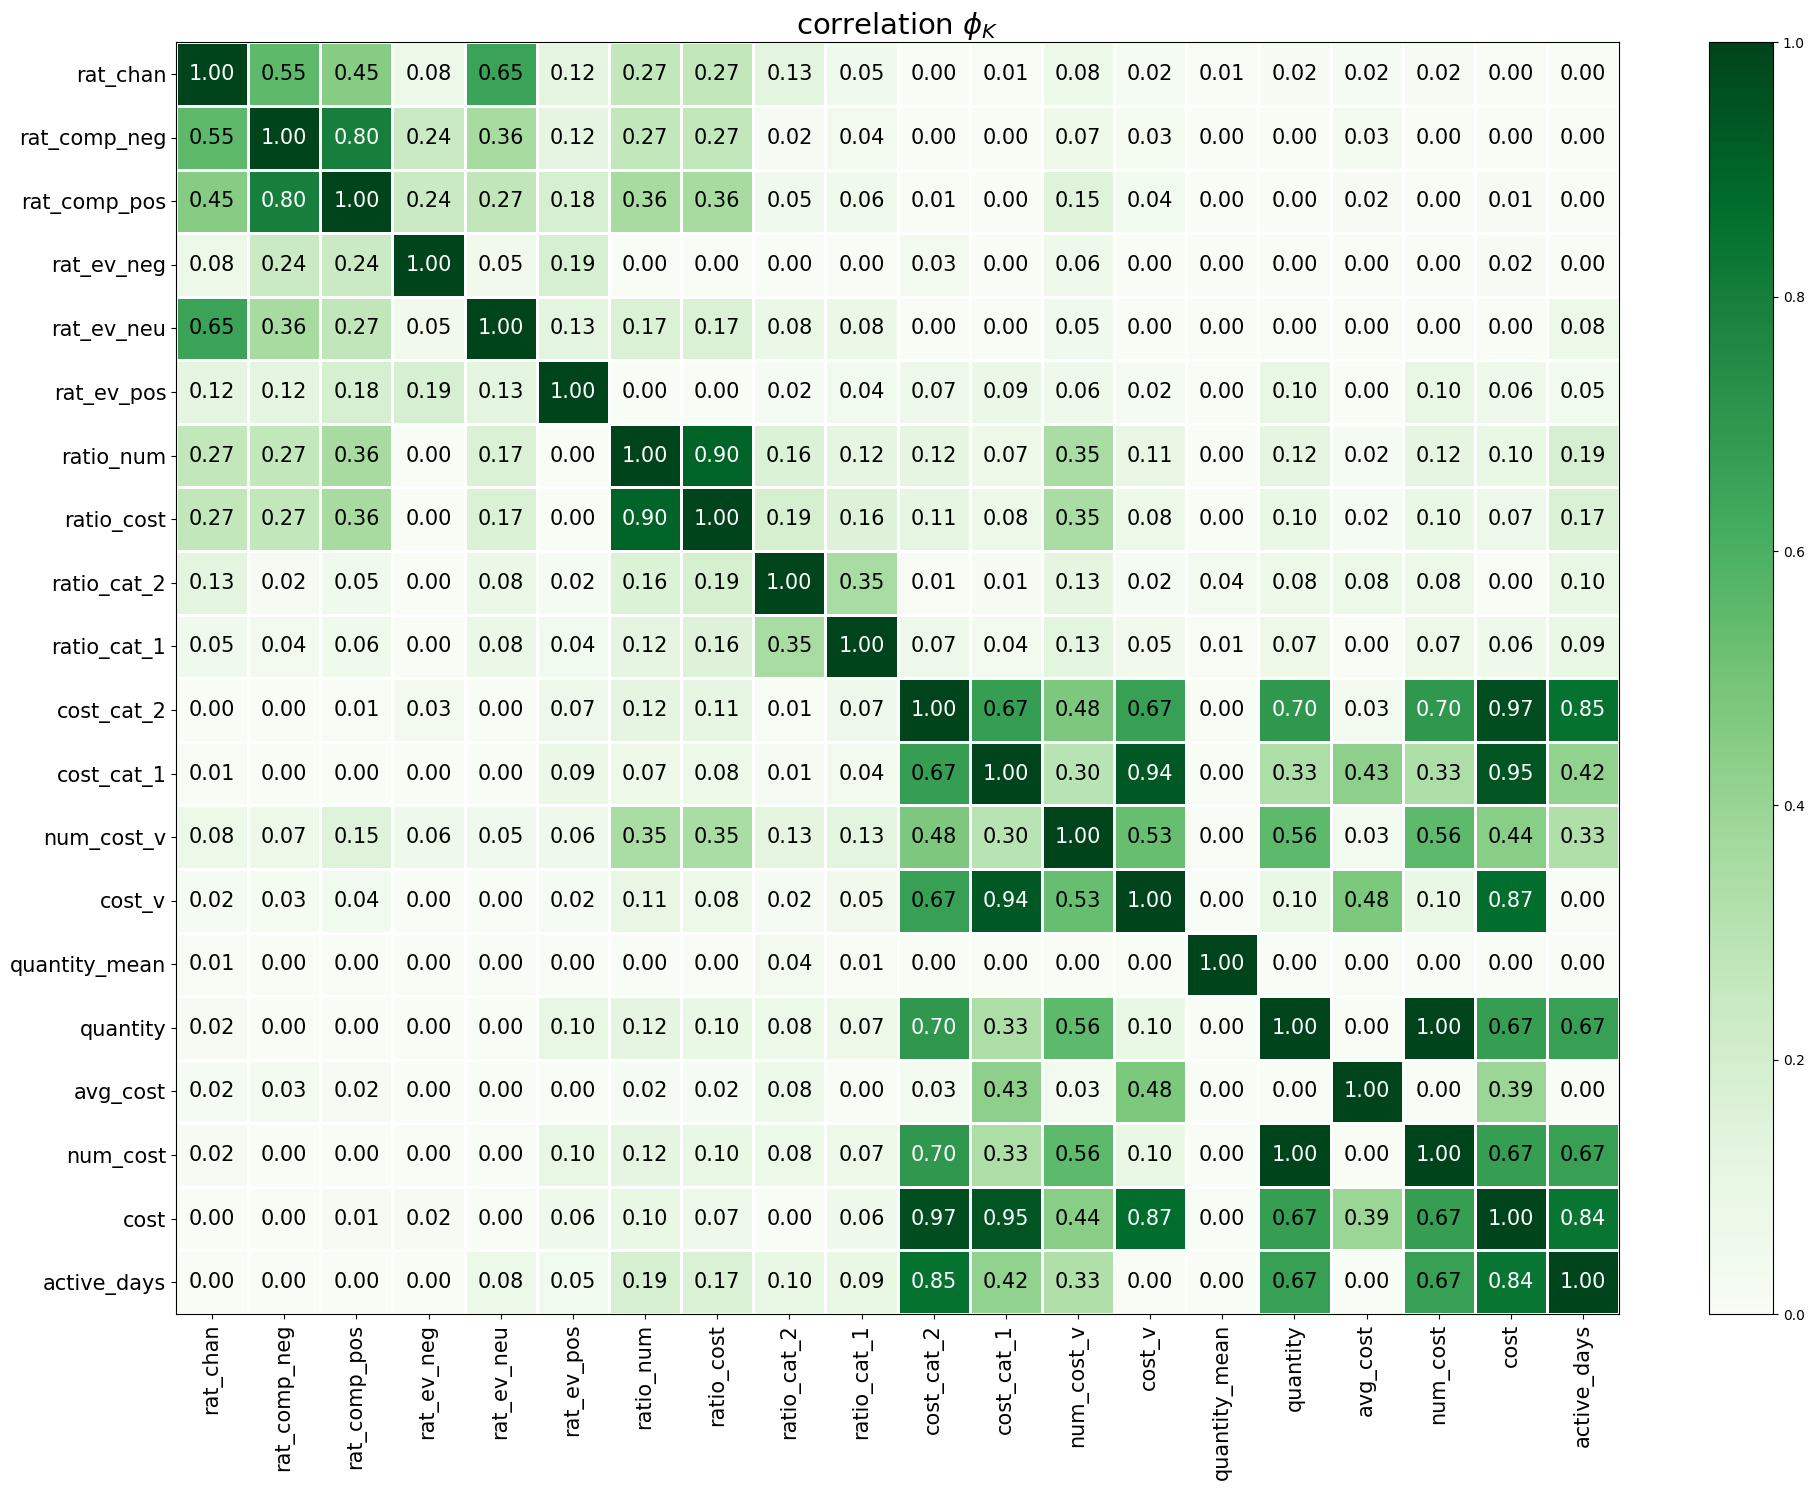

In [172]:
plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    vmin=0, vmax=1, color_map='Greens',
    title=r'correlation $\phi_K$',
    fontsize_factor=1.5,
    figsize=(20, 15)
) 

In [173]:
colm.pop(1)

'cost'

<div class="alert alert-info">
     При анализе взаимных корреляций видно, что недопустимая корреляция наблюдается только в парах cost-cost_cat_1 и cost-cost_cat_2. Поэтому из 
списка признаков colm был удален признак cost. 
</div>

## Построение моделей
   <a id="start_2"></a>

In [176]:
df_f = df_f.merge(df_3, on = 'client_id', how = 'left')

In [177]:
RANDOM_STATE = 42

In [178]:
X_train, X_test, y_train, y_test = train_test_split(
        df_f.drop(['client_id','target', 'cost'], axis=1),
        df_f['target'],
        test_size = 0.25, 
        random_state = RANDOM_STATE)
data_preprocessor = ColumnTransformer(
        [
            ('num', MinMaxScaler(), X_train.columns)
        ], 
        remainder='passthrough')
pipe_final = Pipeline(
    [
        ('preprocessor', data_preprocessor),
        ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
    ]
)

In [179]:
dummy_class = DummyClassifier(strategy='stratified')
dummy_class.fit(X_train, y_train)
y_test_dummy = dummy_class.predict_proba(X_test)[:,1]
r = roc_auc_score(y_test, y_test_dummy)
'метрика roc_auc dummy-модели:', round(r,3)

('метрика roc_auc dummy-модели:', 0.497)

<div class="alert alert-info">
     Проверка классификации на dummy-модели с использование стратегии 'stratified' показывает минимальную точность прогноза, метрика roc_auc порядка 0,5.  
</div>

In [181]:
param_grid = [
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2,100),
        'models__max_features': range(2,100),
        'models__min_samples_leaf': range(1, 50),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2,100),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']   
    },
    
    {
        'models': [SVC(random_state=RANDOM_STATE, probability= True)],
        'models__kernel': ['rbf', 'sigmoid'],
        'models__C': range(1,50),
        'models__gamma': range(1,50),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE, 
            solver='liblinear', 
            penalty='l1'
        )],
        'models__C': range(1,50),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    {
        'models': [RandomForestClassifier(random_state=RANDOM_STATE, n_estimators=200)],
        'models__max_depth': range(2,100),
        'models__max_features': range(2,100),
        'models__min_samples_leaf': range(1, 50),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    {
        'models': [GradientBoostingClassifier(random_state=RANDOM_STATE, n_estimators=200)],
        'models__max_depth': range(2,100),
        'models__max_features': range(2,100),
        'models__min_samples_leaf': range(1, 50),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
     {
        'models': [lgb.LGBMClassifier(random_state=RANDOM_STATE, n_estimators=200, learning_rate=0.3)],
        'models__max_depth': range(2,100),
        'models__min_child_samples': range(2,100)
    }
] 

In [182]:
randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1
)

In [183]:
randomized_search.fit(X_train, y_train)

C:\Users\79284\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('num',
                                                                               MinMaxScaler(),
                                                                               Index(['active_days', 'num_cost', 'avg_cost', 'quantity', 'quantity_mean',
       'cost_v', 'num_cost_v', 'cost_cat_1', 'cost_cat_2', 'ratio_cat_1',
       'ratio_cat_2', 'ratio_cost', 'ratio_num', 'rat_ev_pos', 'rat_ev_neu',
       'rat_ev_n...
                                         'models__max_depth': range(2, 100),
                                         'models__max_features': range(2, 100),
                                         'models__min_samples_leaf': range(1, 50),
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']},
                                        {'models': [LGBMClassifier(learning_rate=0.3,
                                                                   n_estimators=200,
                                                                   random_state=42)],
                                         'models__max_depth': range(2, 100),
                                         'models__min_child_samples': range(2, 100)}],
                   random_state=42, scoring='roc_auc')

In [184]:
randomized_search.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  Index(['active_days', 'num_cost', 'avg_cost', 'quantity', 'quantity_mean',
       'cost_v', 'num_cost_v', 'cost_cat_1', 'cost_cat_2', 'ratio_cat_1',
       'ratio_cat_2', 'ratio_cost', 'ratio_num', 'rat_ev_pos', 'rat_ev_neu',
       'rat_ev_neg', 'rat_comp_pos', 'rat_comp_neg', 'rat_chan'],
      dtype='object'))])),
                ('models',
                 RandomForestClassifier(max_depth=11, max_features=95,
                                        min_samples_leaf=16, n_estimators=200,
                                        random_state=42))])

In [185]:
pd.set_option('display.max_colwidth', None)
pd.DataFrame(randomized_search.cv_results_)[
    ['rank_test_score', 'param_models', 'mean_test_score','params']
    ].sort_values('rank_test_score')

,rank_test_score,param_models,mean_test_score,params
2,1,"RandomForestClassifier(n_estimators=200, random_state=42)",0.716011,"{'preprocessor__num': MinMaxScaler(), 'models__min_samples_leaf': 16, 'models__max_features': 95, 'models__max_depth': 11, 'models': RandomForestClassifier(n_estimators=200, random_state=42)}"
6,2,"RandomForestClassifier(n_estimators=200, random_state=42)",0.714114,"{'preprocessor__num': MinMaxScaler(), 'models__min_samples_leaf': 43, 'models__max_features': 40, 'models__max_depth': 51, 'models': RandomForestClassifier(n_estimators=200, random_state=42)}"
1,3,"RandomForestClassifier(n_estimators=200, random_state=42)",0.713584,"{'preprocessor__num': 'passthrough', 'models__min_samples_leaf': 30, 'models__max_features': 9, 'models__max_depth': 58, 'models': RandomForestClassifier(n_estimators=200, random_state=42)}"
7,4,"RandomForestClassifier(n_estimators=200, random_state=42)",0.711217,"{'preprocessor__num': 'passthrough', 'models__min_samples_leaf': 33, 'models__max_features': 62, 'models__max_depth': 25, 'models': RandomForestClassifier(n_estimators=200, random_state=42)}"
0,5,"RandomForestClassifier(n_estimators=200, random_state=42)",0.703217,"{'preprocessor__num': 'passthrough', 'models__min_samples_leaf': 13, 'models__max_features': 48, 'models__max_depth': 20, 'models': RandomForestClassifier(n_estimators=200, random_state=42)}"
4,6,"GradientBoostingClassifier(n_estimators=200, random_state=42)",0.663475,"{'preprocessor__num': 'passthrough', 'models__min_samples_leaf': 12, 'models__max_features': 75, 'models__max_depth': 85, 'models': GradientBoostingClassifier(n_estimators=200, random_state=42)}"
8,7,"GradientBoostingClassifier(n_estimators=200, random_state=42)",0.641616,"{'preprocessor__num': StandardScaler(), 'models__min_samples_leaf': 27, 'models__max_features': 16, 'models__max_depth': 37, 'models': GradientBoostingClassifier(n_estimators=200, random_state=42)}"
5,8,DecisionTreeClassifier(random_state=42),0.592189,"{'preprocessor__num': 'passthrough', 'models__min_samples_leaf': 38, 'models__max_features': 8, 'models__max_depth': 88, 'models': DecisionTreeClassifier(random_state=42)}"
3,9,DecisionTreeClassifier(random_state=42),0.569887,"{'preprocessor__num': MinMaxScaler(), 'models__min_samples_leaf': 20, 'models__max_features': 86, 'models__max_depth': 80, 'models': DecisionTreeClassifier(random_state=42)}"
9,10,DecisionTreeClassifier(random_state=42),0.515824,"{'preprocessor__num': MinMaxScaler(), 'models__min_samples_leaf': 1, 'models__max_features': 96, 'models__max_depth': 56, 'models': DecisionTreeClassifier(random_state=42)}"


<div class="alert alert-info">
     Лучшей моделью является RandomForestClassifier(n_estimators=200, random_state=42) с метрикой roc_auc на кросс-валидации: 0,716.  
</div>

In [186]:
model = randomized_search.best_estimator_.named_steps['models']

In [187]:
model.feature_importances_

array([0.08789217, 0.01887687, 0.09465382, 0.01767031, 0.00127849,
       0.04459473, 0.03489506, 0.06085391, 0.055434  , 0.02437112,
       0.02826706, 0.0182229 , 0.0280586 , 0.08455553, 0.1323875 ,
       0.02114034, 0.08673151, 0.1105523 , 0.04956379])

In [188]:
feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': np.abs(model.feature_importances_)})
feature_importance = feature_importance.sort_values(by = 'Importance', ascending = True)

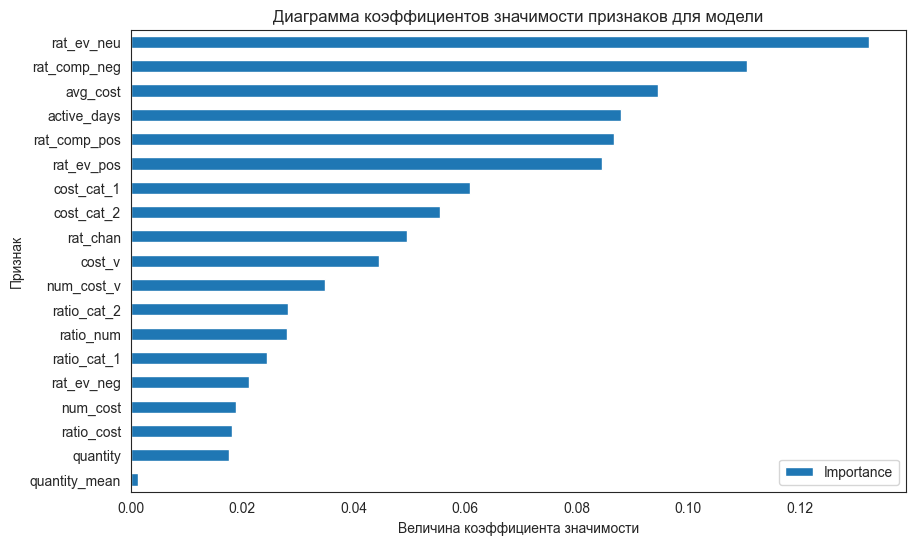

In [189]:
sns.set_style('white')
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))
plt.title('Диаграмма коэффициентов значимости признаков для модели')
plt.xlabel('Величина коэффициента значимости')
plt.ylabel('Признак');

<div class="alert alert-info">
     В наибольшей степени на цель влияют следующие признаки: доля нейтральных событий (rat_ev_neu), доля провальных рекламных компаний (rat_comp_neg),
средняя стоимость заказов (avg_cost), количество дней, в течении которых клиент делал покупки (active_days), доля позитивных рекламных компаний 
(rat_comp_pos), доля позитивных событий (rat_ev_pos), расходы клиента на товары 'любимой' макрокатегории (cost_cat_1) и расходы клиента на товары
любимого сочетаний макро- и микрокатегорий (cost_cat_2).
</div>

In [190]:
selector = SelectKBest(mutual_info_classif, k=10)
selector.fit(X_train, y_train)
features_names = selector.get_feature_names_out()

In [191]:
features_names

array(['active_days', 'quantity', 'quantity_mean', 'cost_v',
       'ratio_cat_1', 'ratio_cat_2', 'ratio_cost', 'ratio_num',
       'rat_ev_neu', 'rat_chan'], dtype=object)

In [192]:
X_train_new = X_train[list(features_names)]
X_test_new = X_test[list(features_names)]

In [193]:
data_preprocessor_ = ColumnTransformer(
        [
            ('num', MinMaxScaler(), X_train_new.columns)
        ], 
        remainder='passthrough')
pipe_final_ = Pipeline(
    [
        ('preprocessor', data_preprocessor_),
        ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
    ]
)

In [194]:
randomized_search_ = RandomizedSearchCV(
    pipe_final_, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1
)

In [195]:
randomized_search_.fit(X_train_new, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('num',
                                                                               MinMaxScaler(),
                                                                               Index(['active_days', 'quantity', 'quantity_mean', 'cost_v', 'ratio_cat_1',
       'ratio_cat_2', 'ratio_cost', 'ratio_num', 'rat_ev_neu', 'rat_chan'],
      dtype='object'))])),
                                             ('models',
                                              DecisionTreeClassifier(random_state=42))]...
                                         'models__max_depth': range(2, 100),
                                         'models__max_features': range(2, 100),
                                         'models__min_samples_leaf': range(1, 50),
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']},
                                        {'models': [LGBMClassifier(learning_rate=0.3,
                                                                   n_estimators=200,
                                                                   random_state=42)],
                                         'models__max_depth': range(2, 100),
                                         'models__min_child_samples': range(2, 100)}],
                   random_state=42, scoring='roc_auc')

In [196]:
randomized_search_.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  Index(['active_days', 'quantity', 'quantity_mean', 'cost_v', 'ratio_cat_1',
       'ratio_cat_2', 'ratio_cost', 'ratio_num', 'rat_ev_neu', 'rat_chan'],
      dtype='object'))])),
                ('models',
                 RandomForestClassifier(max_depth=51, max_features=40,
                                        min_samples_leaf=43, n_estimators=200,
                                        random_state=42))])

In [197]:
pd.set_option('display.max_colwidth', None)
pd.DataFrame(randomized_search_.cv_results_)[
    ['rank_test_score', 'param_models', 'mean_test_score','params']
    ].sort_values('rank_test_score')[:1]

,rank_test_score,param_models,mean_test_score,params
6,1,"RandomForestClassifier(n_estimators=200, random_state=42)",0.698585,"{'preprocessor__num': MinMaxScaler(), 'models__min_samples_leaf': 43, 'models__max_features': 40, 'models__max_depth': 51, 'models': RandomForestClassifier(n_estimators=200, random_state=42)}"


<div class="alert alert-info">
     Сокращение признаков до 10 с помощью метода k-selector не приводит к увеличению метрики roc_auc на кросс-валидации, которая составила 0,708 
(RandomForestClassifier(n_estimators=200, random_state=42)).
</div>

In [198]:
y_test_pred =  randomized_search.predict_proba(X_test)[:,1]
roc_auc_score(y_test, y_test_pred)

0.7372255166029831

<div class="alert alert-info">
     Величина метрики roc_auc на тестовой выборке составляет 0,737.
</div>

## Выводы
   <a id="start_3"></a>

<div class="alert alert-info"> 
 
<b>Загрузка и предобработка данных</b>

    Все загруженные таблицы отображают верный тип данных и не содержат пропусков. В исходных данных 1, 2 и 3 таблиц было обнаружено и удалено 48610
дубликатов.
    
<b> Подготовка данных </b>

     Из 49849 уникальных клиентов только 13 совершали покупки более 10 дней за весь срок наблюдений (641 день). Абсолютное большинство клиентов (42796)
пользовались услугами только 1 день (разовые покупки), а также не 2 раз (5285 клиентов). Соответственно, цель должна быть пропорциональна количеству
дней, в течение которых клиент делал покупки. Однако, из-за большого количества одинаковых значений, данный признак ('active_days') малоинформативен и 
нуждается в уточнении.
     Абсолютное большинство клиентов (49828) в период наблюдений совершили покупки на сумму не более 100000, а максимальная сумма покупок клиента - 540408.
Обшая сумма покупок уникального клиента, по-видимому, пропорциональна цели, поэтому этот признак следует включить в итоговый датафрейм.
    Только 9 клиентов в период наблюдений имели более 100 купленных позиций (максимальное число позиций на клиента 346). Количеств приобретенных позиций
'num_cost' является признаком активности клиента и, вероятно, пропорционально цели. 
     Средняя стоимость всех позиций большинства клиентов (49734) менее 10000 (максималоьная стредняя стоимость позиций клиента 53499). Вероятность цели
должна увеличиваться с ростом средней стоимости ползиции.
    Общее количество единиц товара на одного клиента также может свидетельствовать об его активности и являться признаком, влияющим на цель.
    Среднее количество единиц в каждой приобретенной позиции также может являться признаком активности клиента, влияющим на цель.
    Более Общие расходы клиента на покупку товаров 'любимых' макрокатегорий является признаком, влияющим на цель.
    50 % заказов составляют товары только 2 'любимых' крупных категорий. Можно предположить, что постоянные клиенты покупают товары именно этих 2
крупных категорий.
    Общие расходы клиента на покупку товаров 'любимых' макрокатегорий является признаком, влияющим на цель.
    Также выявлено 100 'любимых' сочетаний макро- и микрокатегорий (около 50 % всех заказов), доля которых в покупках клиентов выявляет склонность 
клиента к постоянству.
    Общие расходы клиента на покупку товаров 100 'любимых' сочетаний макро- и микрокатегорий является признаком, влияющим на цель.
    Активность клиента в последние 100 дней наблюдаемого периода связана с целью и может свидетельствовать о снижении вероятности цели 
(клиент в последний период много покупал, и надобность в покупаках могла не успеть сформироваться в валидационный период). Соответственно, общая сумма
покупок клиента в последние 100 дней является признаком, влияющим на цель.
    Количество купленных заказов (позиций) клиента в последние 100 дней характеризует его активность перед валидационным периодом, и, соответственно,
влияет на цель.
    Новые признаки были объеденены в единый датафрейм df_1_f. В качестве признаков были введены также новые поля, характеризующие долю суммы покупок 
клиентов в последние 100 дней ('ratio_cost'), долю количества позиций, приобретенных клиентом в последние 100 дней ('ratio_num'), долю затрат клиента 
на 'любимую' макрокатегорию ('ratio_cat_1'), доля трат клиента на 'любимое' сочетание макро- и микрокатегорий ('ratio_cat_2') и доля отправленных
сообщений, которая приходится на 1 позицию заказаь клиента. 
    События в поле 'event' были выделены в 3 группы: позитивные, нейтральные и негативные. Для каждого клиента были найдены доли позитивных, нейтральных 
и негативных реакций на сообщения, которые являются признаками, влияющими на цель.
    Новые признаки добавлены в финальную таблицу df_f. Пропуски в столбцах заменены медианными значениями.
    Был получен список из 100 рекламных компаний, которые давали в сумме наиболее успешный результат в последние 100 дней наблюдаемого периода. Для
каждого клиента была найдена доля наиболее успешных (в последние 100 дней) рекламных компаний ('rat_comp_pos'), которая, вероятно, будет пропорциональна
цели.
    Был получен список из 100 рекламных компаний, которые давали в сумме негативный результат в последние 100 дней наблюдаемого периода. Для
каждого клиента была найдена доля наиболее провальных (в последние 100 дней) рекламных компаний ('rat_comp_neg'), которая должна обратнопропорционально
влиять на цель.
    Новые признаки (доли позитивных и негативных рекламных компаний) были добавлены в итоговый датафрейм, а пропуски заменены медианными значениями 
данных признаков.
    При анализе каналов, которые использовались в последние 100 дней наблюдаемого периода, выяснилось, что по совокупности ежедневных уникальных 
позитивных действий, канал mobile_push на 95 % более эффективен, чем email. Сравнение суммы уникальных негативных действий показывает также, что 
канал mobile_push имеет на 20 % меньше негативных действий, чем email. 
    Для каждого клиента была найдена доля сообщений, отправленных через канал push_mobile ('rat_chan'), которая добавлена в финальный датафрейм в 
в качестве признака, влияющего на цель.
    При анализе взаимных корреляций видно, что недопустимая корреляция наблюдается только в парах cost-cost_cat_1 и cost-cost_cat_2. Поэтому из 
списка признаков colm был удален признак cost.

<b> Построение моделей </b>

    Проверка классификации на dummy-модели с использование стратегии 'stratified' показывает минимальную точность прогноза, метрика roc_auc порядка 0,5. 
    Лучшей моделью является RandomForestClassifier(n_estimators=200, random_state=42) с метрикой roc_auc на кросс-валидации: 0,716.  
    В наибольшей степени на цель влияют следующие признаки: доля нейтральных событий (rat_ev_neu), доля провальных рекламных компаний (rat_comp_neg),
средняя стоимость заказов (avg_cost), количество дней, в течении которых клиент делал покупки (active_days), доля позитивных рекламных компаний 
(rat_comp_pos), доля позитивных событий (rat_ev_pos), расходы клиента на товары 'любимой' макрокатегории (cost_cat_1) и расходы клиента на товары
любимого сочетаний макро- и микрокатегорий (cost_cat_2).
     Сокращение признаков до 10 с помощью метода k-selector не приводит к увеличению метрики roc_auc на кросс-валидации, которая составила 0,708 
(RandomForestClassifier(n_estimators=200, random_state=42)).
    Величина метрики roc_auc на тестовой выборке составляет 0,737.